## Looking at the Synthetic Data

In [1]:
import numpy as np 
from metrics.visualization_metrics import visualization

with open('data/stock_synthetic_data.npy', 'rb') as f:
    generated_data = np.load(f)

with open('data/stock_real_data.npy', 'rb') as f:
    ori_data = np.load(f)

print(ori_data.shape)
print(generated_data.shape)

(3661, 24, 6)
(3661, 24, 6)


### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

In [2]:
with open('data/stock_attention_weights.npy', 'rb') as f:
    new_edge_index = np.load(f).T

with open('data/stock_graph.npy', 'rb') as f:
    att_weight = np.load(f)

print(new_edge_index.shape)
print(att_weight.shape)

(30, 2)
(30, 1, 1)


In [3]:
# print(new_edge_index)
# print(att_weight)

In [4]:
def get_adj_matrix(adj_mat, att_weight):
    adj_matrix = [[0]*ori_data.shape[2] for _ in range(ori_data.shape[2])]
    for i in range(len(adj_mat)):
        adj_matrix[adj_mat[i][0]][adj_mat[i][1]] = att_weight[i][0][0]
    
    return adj_matrix


In [5]:
weighted_adjacency_matrix = get_adj_matrix(new_edge_index, att_weight)

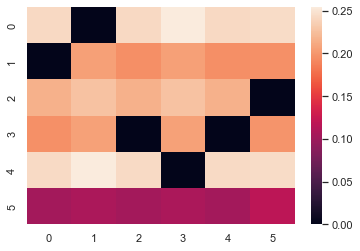

In [6]:
import seaborn as sns
sns.set_theme()
ax = sns.heatmap(weighted_adjacency_matrix)

In [7]:
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics

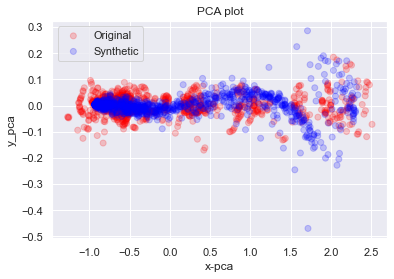

C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.016309
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.222298
[t-SNE] KL divergence after 300 iterations: 0.737861


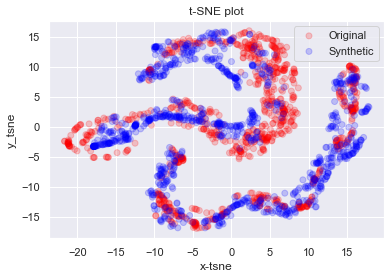

In [8]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

## Evaluate the generated data
### 1. Discriminative score
To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.



*   metric_iteration: the number of iterations for metric computation.




In [9]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\discriminative_metrics.py:81: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'd_cell')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use tf.global_variables instead.


C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\discriminative_metrics.py:84: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_hat_logit = tf1.layers.dense(d_last_states, 1, activation=None)
C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\discriminative_metrics.py:81: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'd_cell')
C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\discriminative_metrics.py:84: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_hat_logit = tf1.layers.dense(d_last_states, 1, activation=None)
C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\discriminative_metrics.py:81: Use

Discriminative score: 0.1819


## Evaluate the generated data

### 2. Predictive score
To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [10]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\predictive_metrics.py:72: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  p_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'p_cell')
C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\predictive_metrics.py:75: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_hat_logit = tf1.layers.dense(p_outputs, 1, activation=None)
C:\Users\harsh\OneDrive\Desktop\GTSGAN\metrics\predictive_metrics.py:72: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  p_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'p_cell')
C

Predictive score: 0.0415
